In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

housingData = pd.read_csv("C:\\Users\\shrey\\Downloads\\deciCleaned.csv")
housingData


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Income_category,Area_density,Rooms_per_Household,age_category,<1H Ocean,Inland,Island,Near Bay,Near Ocean
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,High,2.555556,6.984127,Old,0,0,0,1,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,High,2.109842,6.238137,Mid-Age,0,0,0,1,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,High,2.802260,8.288136,Old,0,0,0,1,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,Low,2.547945,5.817352,Old,0,0,0,1,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,Low,2.181467,6.281853,Old,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND,Low,2.560606,5.045455,Mid-Age,0,1,0,0,0
20429,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND,Low,3.122807,6.114035,Mid-Age,0,1,0,0,0
20430,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,INLAND,Low,2.325635,5.205543,Mid-Age,0,1,0,0,0
20431,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND,Low,2.123209,5.329513,Mid-Age,0,1,0,0,0


In [11]:
print('Print first few rows of this data -\n')
print(housingData.head())

Print first few rows of this data -

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  \
0         322         126         8.3252              452600        NEAR BAY   
1        2401        1138         8.3014              358500        NEAR BAY   
2         496         177         7.2574              352100        NEAR BAY   
3         558         219         5.6431              341300        NEAR BAY   
4         565         259         3.8462              342200        NEAR BAY   

  Income_category  Area_density

In [13]:
cols_to_drop = ['Unnamed: 19', '<1H Ocean', 'Inland', 'Island', 'Near Bay', 'Near Ocean']
housingData = housingData.drop(columns=[col for col in cols_to_drop if col in housingData.columns])


In [15]:
X = housingData.drop(['median_house_value'], axis=1)
y = housingData['median_house_value'].values

In [17]:
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [19]:
imputer = SimpleImputer(strategy='mean')
X_numeric = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)


In [21]:
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)


In [23]:
X_processed = pd.concat([X_numeric, X_categorical], axis=1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)


In [27]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()


In [29]:
# Task1: Perform Linear Regression 
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
predictionLinear = linearRegression.predict(X_test)
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression =', np.sqrt(mseLinear))

Root mean squared error (RMSE) from Linear Regression = 0.5852729759994202


In [31]:
# Task2: Perform Decision Tree Regression
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)
predictionDT = DTregressor.predict(X_test)
mseDT = mean_squared_error(y_test, predictionDT)
print('Root mean squared error from Decision Tree Regression =', np.sqrt(mseDT))


Root mean squared error from Decision Tree Regression = 0.6257766432131423


In [35]:
# Task3: Perform Random Forest Regression
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)
predictionRF = RFregressor.predict(X_test)
mseRF = mean_squared_error(y_test, predictionRF)
print('Root mean squared error from Random Forest Regression =', np.sqrt(mseRF))

Root mean squared error from Random Forest Regression = 0.4282568406527529


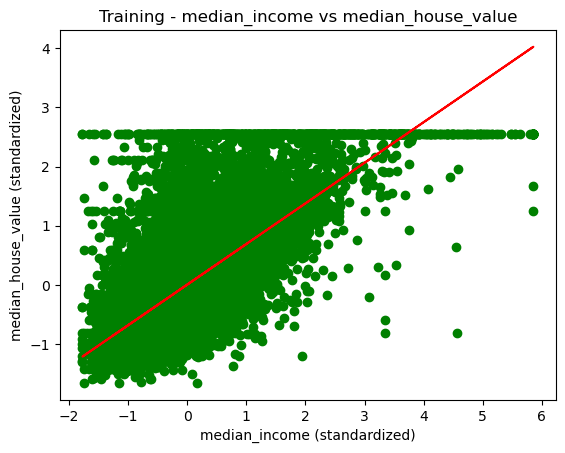

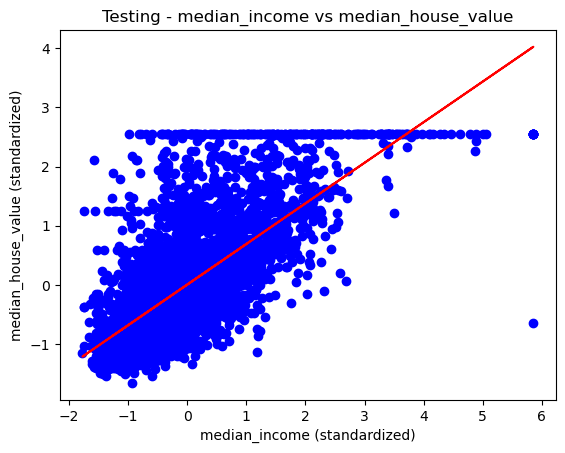

In [39]:
# Task4: Bonus exercise: Linear Regression with one feature
# Find index of 'median_income' in processed columns
feature_names = X_processed.columns.tolist()
median_income_index = feature_names.index('median_income')

# Extract only median_income from scaled X_train/X_test
X_train_median_income = X_train[:, [median_income_index]]
X_test_median_income = X_test[:, [median_income_index]]

# Train and predict
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)
predictionLinear2 = linearRegression2.predict(X_test_median_income)

# Visualize Training set
plt.scatter(X_train_median_income, y_train, color='green')
plt.plot(X_train_median_income, linearRegression2.predict(X_train_median_income), color='red')
plt.title('Training - median_income vs median_house_value')
plt.xlabel('median_income (standardized)')
plt.ylabel('median_house_value (standardized)')
plt.show()

# Visualize Testing set
plt.scatter(X_test_median_income, y_test, color='blue')
plt.plot(X_train_median_income, linearRegression2.predict(X_train_median_income), color='red')
plt.title('Testing - median_income vs median_house_value')
plt.xlabel('median_income (standardized)')
plt.ylabel('median_house_value (standardized)')
plt.show()


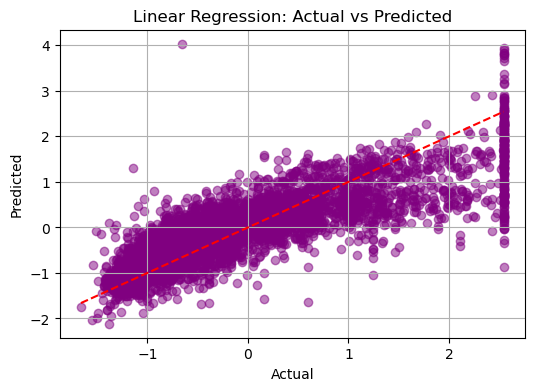

In [47]:
# Actual vs Predicted - Linear Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, predictionLinear, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

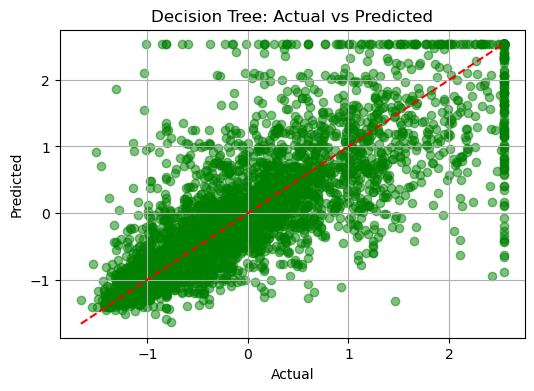

In [49]:
# Actual vs Predicted - Decision Tree
plt.figure(figsize=(6,4))
plt.scatter(y_test, predictionDT, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


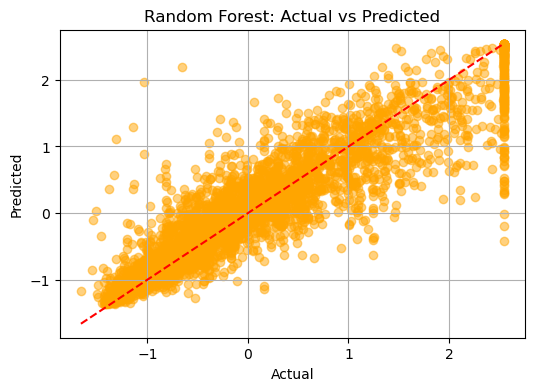

In [51]:
# Actual vs Predicted - Random Forest
plt.figure(figsize=(6,4))
plt.scatter(y_test, predictionRF, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

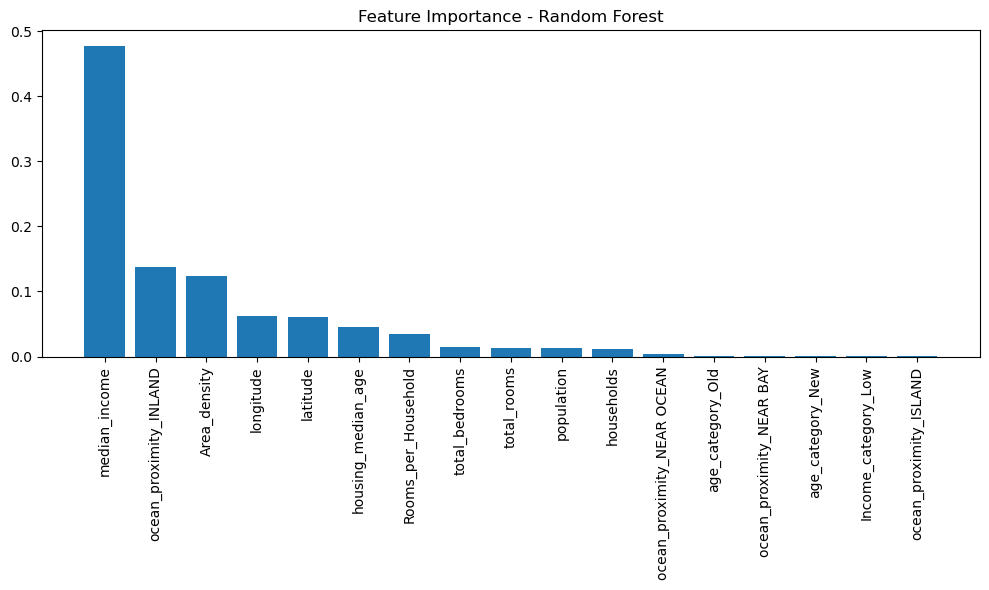

In [53]:
# Feature importance
importances = RFregressor.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_processed.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_processed.shape[1]), importances[indices], align='center')
plt.xticks(range(X_processed.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

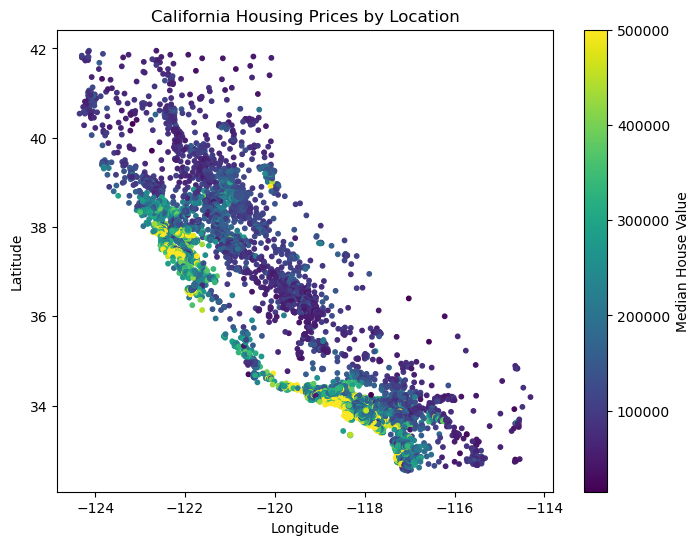

In [55]:
# Regional Disparity(Price Hotspots by Geo Location)
# Visualizing price by geo-coordinates
plt.figure(figsize=(8,6))
plt.scatter(housingData['longitude'], housingData['latitude'],
            c=housingData['median_house_value'], cmap='viridis', s=10)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.show()

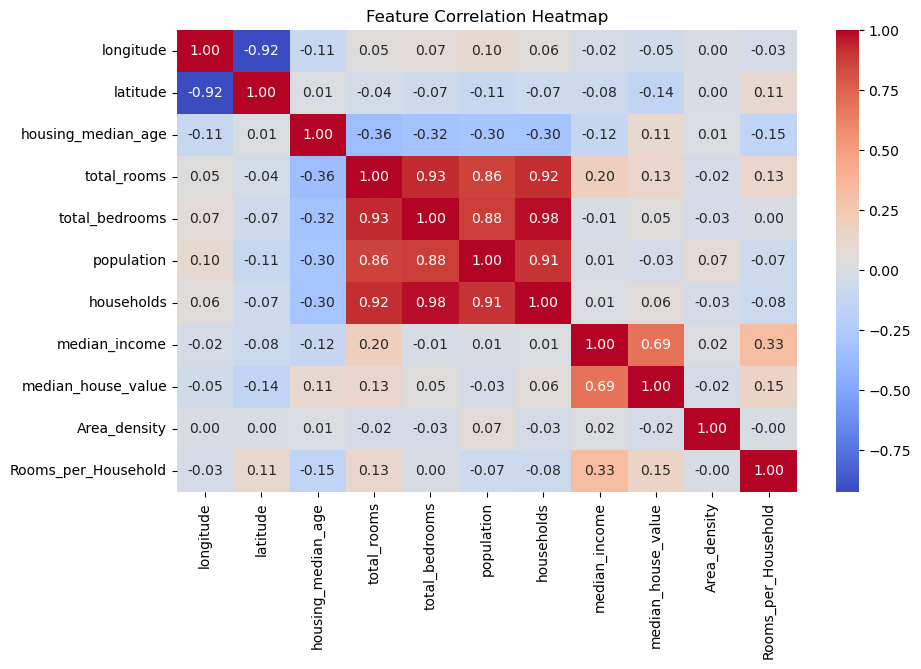

In [59]:
# Correlation heatmap with only numeric columns
import seaborn as sns
plt.figure(figsize=(10,6))
numeric_data = housingData.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()